In [1]:
! pip3 install pydub
! pip3 install librosa


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [103]:
audio_files = glob('./fivehearts.wav')

In [104]:
ipd.Audio(audio_files[0])

In [105]:
y, sr = librosa.load(audio_files[0])
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [0.14697771 0.21832378 0.19269143 0.2072285  0.20206769 0.20445529
 0.20223215 0.2085684  0.20607299 0.20792682]
shape y: (183626,)
sr: 22050


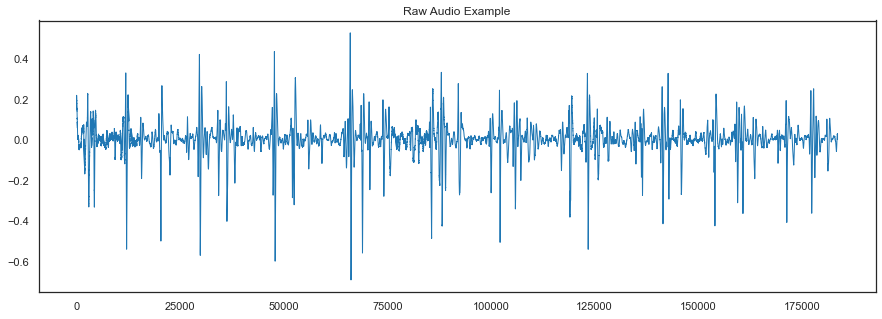

In [106]:
pd.Series(y).plot(figsize=(15, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()

split waves in five parts to make the tattoo unique for everybody 

In [107]:
right_lim= int(y.shape[0]/5)
print("interval size", right_lim)

interval size 36725


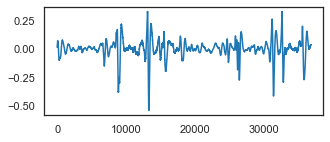

In [216]:
i = 3
y_sub = y[i*right_lim:(i+1)*right_lim]
plt.figure(figsize=(5, 2))
plt.plot(pd.Series(y_sub), '-', )
#plt.axis('off')
ipd.Audio(data=np.array(y_sub), rate=40000)

Compression by bninning

In [267]:
import numpy as np

i = 0
n = 100

n_bin = int(right_lim / n)
Y = y[i*right_lim:(i+1)*right_lim]

binned = []
for i in range(n):
    yI = list(Y[i*n_bin:(i+1)*n_bin])
    binned.append(yI)
    
binned = np.array(binned)
y_bin = np.sum(binned, axis=1)

Show 

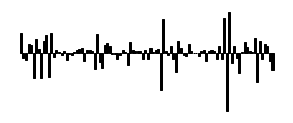

In [368]:
#ylim = 100

plt.figure(figsize=(5, 2))
plt.bar(range(n),y_bin, color='black', edgecolor='black')
plt.axis('off')
#plt.ylim([-ylim,ylim])
#plt.savefig('demo6.png', transparent=True)

ipd.Audio(data=np.array(y_bin), rate=3000)

Truncate to integers

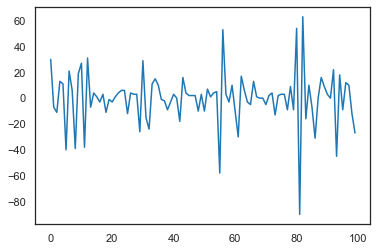

In [369]:
a = np.int16(y_bin-np.min(y_bin))+np.int16(np.min(y_bin))
a = np.int16(y_bin)
plt.plot(a)

Reverse enginering by interpolation

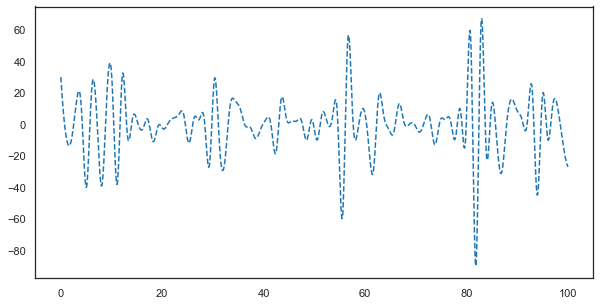

In [370]:
from scipy.interpolate import interp1d
y2 = a
xnew = np.linspace(0, y2.shape[0], num=y2.shape[0]*15, endpoint=True)
x = np.linspace(0, y2.shape[0], num=y2.shape[0], endpoint=True)
f1 = interp1d(x, y2, kind='cubic')

plt.figure(figsize=(10,5))
plt.plot(xnew, f1(xnew), '--')

In [371]:
ipd.Audio(data=f1(xnew), rate=3000, normalize=True)

Design-1: Plot the dots

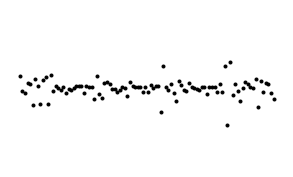

In [372]:
ylim = 200

plt.figure(figsize=(5, 3))
plt.plot(range(n),y_bin, '.', color='black', linewidth=1)
plt.axis('off')
plt.ylim([-ylim,ylim])
plt.savefig('punti10.png', transparent=True)

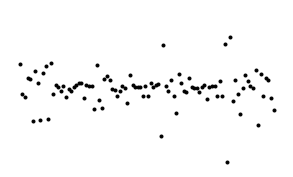

In [373]:
ylim = 100

plt.figure(figsize=(5, 3))
plt.plot(range(n),a, '.', color='black', linewidth=1)
plt.axis('off')
plt.ylim([-ylim,ylim])
plt.savefig('punti10.png', transparent=True)

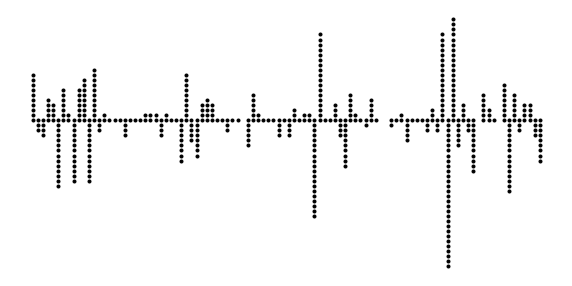

In [374]:
plt.figure(figsize=(10, 5))

yy = a
for v, i in zip(yy, range(len(yy))):
    s=1
    if v<0:
        s = -1
        
    for j in np.arange(0, abs(v), 3): 
        vv = j
        if s==-1:
            vv = -j
            
        plt.plot(i,vv, '.', color='black', linewidth=0.1)
        
aa = plt.axis('off')


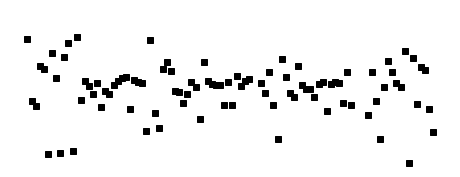

In [375]:
ylim = 50

plt.figure(figsize=(8, 3))
plt.plot(range(n),y_bin, 's', color='black', linewidth=1)
plt.axis('off')
plt.ylim([-ylim,ylim])
plt.savefig('punti10.png', transparent=True)

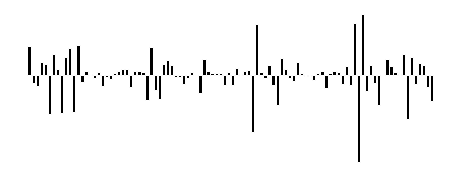

In [376]:
ylim = 100

plt.figure(figsize=(8, 3))
plt.bar(range(n),y_bin, color='black')
plt.axis('off')
#plt.ylim([-ylim,ylim])
plt.savefig('punti10.png', transparent=True)

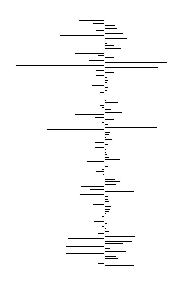

In [377]:
ylim = 100

plt.figure(figsize=(3, 5))
plt.barh(range(n),y_bin, color='black')
plt.axis('off')
#plt.ylim([-ylim,ylim])
plt.savefig('punti10.png', transparent=True)

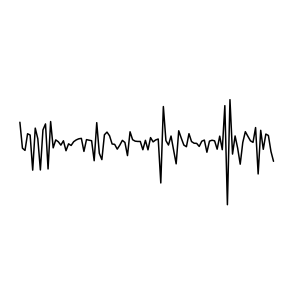

In [378]:
ylim = 200

plt.figure(figsize=(5, 5))
plt.plot(range(n),y_bin, '-', color='black')
plt.axis('off')
plt.ylim([-ylim,ylim])
plt.savefig('punti10.png', transparent=True)

In [54]:
D = librosa.stft(y_trimmed)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 76)

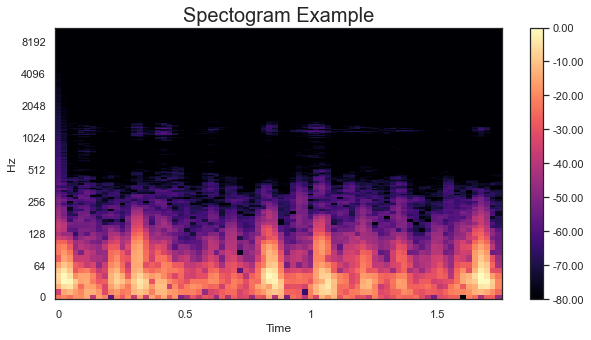

In [55]:
# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [56]:
S = librosa.feature.melspectrogram(y=y_trimmed,
                                   sr=sr,
                                   n_mels=128 * 2,)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

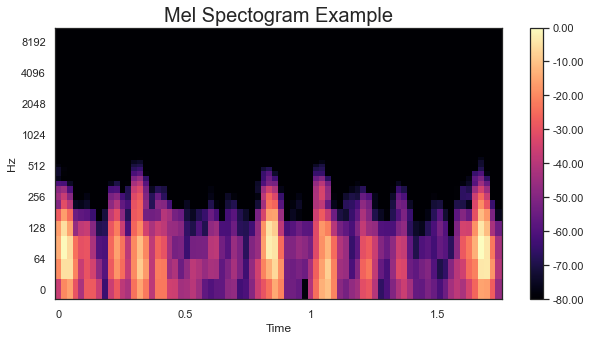

In [57]:
fig, ax = plt.subplots(figsize=(10, 5))
# Plot the mel spectogram
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()